# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [7]:
from math import sqrt

import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [8]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [9]:
fifa = pd.read_csv("fifa.csv")

In [10]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [11]:
# Sua análise começa aqui.
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [15]:
#dataframe auxiliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : fifa.columns,
                    'tipo': fifa.dtypes,
                    'missing': fifa.isna().sum(),
                    'size': fifa.shape[0],
                    'unicos': fifa.nunique()})
cons['percentual']=round(cons['missing']/cons['size'],4)

In [16]:
cons

,colunas,tipo,missing,size,unicos,percentual
Age,Age,int64,0,18207,29,0.0000
Overall,Overall,int64,0,18207,48,0.0000
Potential,Potential,int64,0,18207,47,0.0000
Crossing,Crossing,float64,48,18207,89,0.0026
Finishing,Finishing,float64,48,18207,93,0.0026
HeadingAccuracy,HeadingAccuracy,float64,48,18207,91,0.0026
ShortPassing,ShortPassing,float64,48,18207,85,0.0026
Volleys,Volleys,float64,48,18207,87,0.0026
Dribbling,Dribbling,float64,48,18207,94,0.0026
Curve,Curve,float64,48,18207,89,0.0026


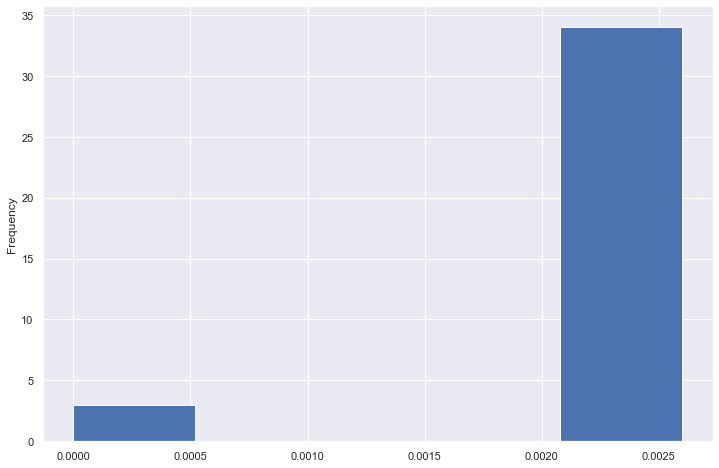

In [17]:
#plotando histograma
#cons.percentual.plot.hist(bins=5)
#percentual de faltantes é muito baixo

In [20]:
print('contagem de colunas com até 2.5% de missing values', cons[cons.percentual < 0.025].shape[0])
print('contagem de colunas com até 0% de missing values', cons[cons.percentual == 0].shape[0])

contagem de colunas com até 2.5% de missing values 37
contagem de colunas com até 0% de missing values 3


In [24]:
#iremos eliminar as linhas com dados faltantes
fifa.dropna(inplace=True)


NameError: name 'missing_data' is not defined

In [25]:
fifa.shape
fifa.describe()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,71.319126,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.670568,6.914613,6.134420,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [51]:
def q1():
    # Retorne aqui o resultado da questão 1.
    from sklearn.decomposition import PCA
    pca=PCA(0.95)
    pca.fit(fifa)
    var=pca.explained_variance_ratio_
    resp=float(var[0].round(3))
    return (resp)

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [32]:
def q2():
    # Retorne aqui o resultado da questão 2.
    from sklearn.decomposition import PCA
    pca=PCA(0.95)
    fifa_redu=pca.fit_transform(fifa)
    return(fifa_redu.shape[1])

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [33]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [45]:
def q3():
    # Retorne aqui o resultado da questão 3.
    pca = PCA().fit(fifa)
    resp = pca.components_.dot(x)
    return (resp[0].round(3), resp[1].round(3))

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [46]:
def q4():
    # Retorne aqui o resultado da questão 4.
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    
    # Dropando Overall -- (variável de interesse)
    X_train = fifa.drop('Overall', 1)
    y_pred = fifa['Overall']

    # realizando RFE
    rfe = RFE(LinearRegression(), n_features_to_select=5)
    rfe.fit(X_train,y_pred)

    # Armazenando variáveis selecionadas
    features = rfe.support_
    result = X_train.columns[features]

    return list(result)

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']